## Study Design

In [74]:
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

### Overall aim 
- Link multimodal imaging and FRB! registry’s clinical data to describe the temporal relationship between the **first loss of foveal centre point**, **visual decline**, and **clinical diagnosis of *subfoveal macular atrophy*** in routine clinical practice. 

### Hypothesis 
- I want to know whether the first loss of foveal centre point due to macular atrophy and visual decline occur simultaneously *(Hypothesis 1)*. 

- If the two events do not occur simultaneously, I want to know whether clinicians from FRB! registry diagnose *subfoveal macular atrophy* based on the visual decline or the first loss of foveal centre point *(Hypothesis 2)*. 


### Definition 

- **Centre point involvement**: Time when the macular atrophy first involves the foveal centre point. 

- **Visual acuity decline**: Time when the patient’s visual acuity drops significantly from last visit.

- **Clinical diagnosis of *subfoveal macular atrophy***: Time when the clinician diagnoses the patient with *subfoveal macular atrophy*.

### Overall schema
*Note that this schema assumes centre point involvement occurs before clinical diagnosis and vision loss.*

![image info](./Picture.png)

### Methodology for obtaining and linking imaging data and 

- **Centre point involvement**: Dual grading and establish the time when the first loss of foveal centre point occured.

- **Visual acuity decline**: Obtain longitudinal visual acuity data and statistically determine the time when significant visual acuity decline occured. 

- **Clinical diagnosis of *subfoveal macular atrophy***: Obtain longitudinal clinical data, including free text notes, and determine the time when the clinician first diagnose the patient with *subfoveal macular atrophy*. 


### Sample data
![image info](./Table1.png)


In [75]:
# Read CSV data and convert into a Pandas Dataframe 
data = pd.read_csv('file_name.csv')


# Manually put data in here:
#data = pd.DataFrame({
#    "Patient": [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
#    "First foveal centre loss (months)": [2,3,4,1,3,4,5,2,4,5,6,3,7,8,9],
#    "VA decline (months)": [5,8,5,2,3,7,6,2,3,6,9,9,7,12,11],
#    "Clinical diagnosis (months)": [5,4,4,2,3,7,6,2,3,6,9,9,7,8,10]
#})

In [ ]:
print(data)

In [77]:
# Calculate the differences between time points
data["Centre Point Loss to VA Decline"] = data["VA decline (months)"] - data["First foveal centre loss (months)"]
data["Centre Point Loss to Clinical Diagnosis"] = data["Clinical diagnosis (months)"] - data["First foveal centre loss (months)"]
data["VA Decline to Clinical Diagnosis"] = data["Clinical diagnosis (months)"] - data["VA decline (months)"]

### Description statistics

1. Obtain mean time interval between two events 
2. Plot a timeline using the mean intervals

Mean Centre Point Loss to Clinical Diagnosis:  1.2666666666666666 
Std Centre Point Loss to Clinical Diagnosis:  1.791514389985135

Mean Centre Point Loss to VA Decline:  1.9333333333333333 
Std Centre Point Loss to VA Decline:  2.016597794967223

Mean VA Decline to Clinical Diagnosis:  -0.6666666666666666 
Std VA Decline to Clinical Diagnosis:  1.397276262011544


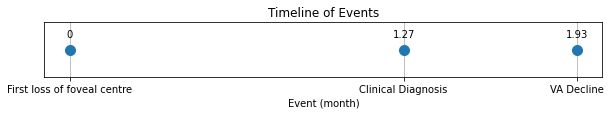

In [78]:
# Calculate the mean differences between time points
mean_disease_to_diagnosis = data["Centre Point Loss to Clinical Diagnosis"].mean()
mean_va_to_diagnosis = data["VA Decline to Clinical Diagnosis"].mean()
mean_disease_to_va = data["Centre Point Loss to VA Decline"].mean()


# Plot the timeline based on mean differences between time points
events =  ["First loss of foveal centre", "Clinical Diagnosis", "VA Decline"]

formatted_mean_disease_to_diagnosis = round(mean_disease_to_diagnosis,2)
formatted_mean_disease_to_va = round(mean_disease_to_va,2)

print('Mean Centre Point Loss to Clinical Diagnosis: ',data["Centre Point Loss to Clinical Diagnosis"].mean(),'\nStd Centre Point Loss to Clinical Diagnosis: ',data["Centre Point Loss to Clinical Diagnosis"].std())

print('\nMean Centre Point Loss to VA Decline: ',data["Centre Point Loss to VA Decline"].mean(),'\nStd Centre Point Loss to VA Decline: ',data["Centre Point Loss to VA Decline"].std())

print('\nMean VA Decline to Clinical Diagnosis: ',data["VA Decline to Clinical Diagnosis"].mean(),'\nStd VA Decline to Clinical Diagnosis: ',data["VA Decline to Clinical Diagnosis"].std())

relative_positions = [0, abs(formatted_mean_disease_to_diagnosis), abs(formatted_mean_disease_to_va)]  

# Plot the timeline
plt.figure(figsize=(10, 1))
plt.plot(relative_positions, [0] * len(relative_positions), marker='o', markersize=10, linestyle='')
plt.xticks(ticks=relative_positions, labels=events)
plt.xlabel("Event (month)")
plt.yticks([])
plt.title("Timeline of Events")

# Add text annotations for relative positions
for i, pos in enumerate(relative_positions):
    plt.text(pos, 0.02, str(pos), ha='center', va='bottom')

plt.grid(axis='x')
plt.show()

In [79]:
print('Mean Centre Point Loss to Clinical Diagnosis: ',data["Centre Point Loss to Clinical Diagnosis"].mean(),'\nStd Centre Point Loss to Clinical Diagnosis: ',data["Centre Point Loss to Clinical Diagnosis"].std())

print('\nMean Centre Point Loss to VA Decline: ',data["Centre Point Loss to VA Decline"].mean(),'\nStd Centre Point Loss to VA Decline: ',data["Centre Point Loss to VA Decline"].std())

print('\nMean VA Decline to Clinical Diagnosis: ',data["VA Decline to Clinical Diagnosis"].mean(),'\nStd VA Decline to Clinical Diagnosis: ',data["VA Decline to Clinical Diagnosis"].std())

Mean Centre Point Loss to Clinical Diagnosis:  1.2666666666666666 
Std Centre Point Loss to Clinical Diagnosis:  1.791514389985135

Mean Centre Point Loss to VA Decline:  1.9333333333333333 
Std Centre Point Loss to VA Decline:  2.016597794967223

Mean VA Decline to Clinical Diagnosis:  -0.6666666666666666 
Std VA Decline to Clinical Diagnosis:  1.397276262011544


## Hypothesis 1
Do the first foveal centre loss due to macular atrophy and visual acuity loss occur simultaneously?
### 1. Statistical analysis - Contingency table
Check whether foveal centre loss happen before, simultaneously with, or after VA loss

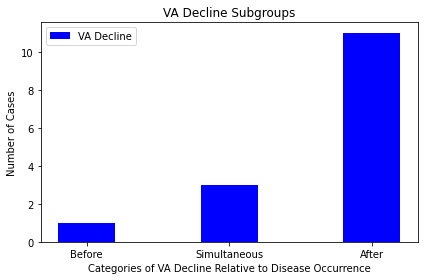

In [80]:
# Categorize into subgroups based on time differences
categories = ['Before', 'Simultaneous', 'After']
before_count = len(data[data["Centre Point Loss to VA Decline"] < 0])
simultaneous_count = len(data[data["Centre Point Loss to VA Decline"] == 0])
after_count = len(data[data["Centre Point Loss to VA Decline"] > 0])

va_decline_counts = [before_count, simultaneous_count, after_count]

# Create a bar graph with subgroups
fig, ax = plt.subplots()
bar_width = 0.4
bar_positions = range(len(categories))

# Plot the bar graph for VA decline counts
ax.bar(bar_positions, va_decline_counts, bar_width, label='VA Decline', color='blue')

# Customize the plot
ax.set_xlabel('Categories of VA Decline Relative to Disease Occurrence')
ax.set_ylabel('Number of Cases')
ax.set_title('VA Decline Subgroups')
ax.set_xticks(bar_positions)
ax.set_xticklabels(categories)
ax.legend()

plt.tight_layout()
plt.show()

### 2. Statistical analysis - Paired t-test
Paired t-test to check whether 'foveal centre point loss to VA decline' [difference between two events] is significantly different from 0 

In [72]:
_, p_value = stats.ttest_rel(data["Centre Point Loss to VA Decline"],[0]*len(data))
print('p_value is:', p_value)

p_value is: 0.002316603243992738


Given this scenario, we can conclude that the first centre point loss and VA decline don't occur simultaneously. 

## Hypothesis 2
Do clinicians define subfoveal macular atrophy based on VA decline or the first loss of foveal centre point?
### 1. Statistical analysis - Contingency table
Check whether Clinical diagnosis of subfoveal macular atrophy happen simulatneously with centre point loss, VA decline, or not simultaneously with either event. 


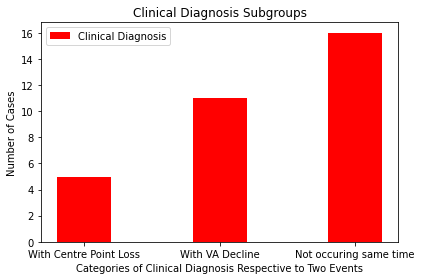

In [83]:
categories = ['With Centre Point Loss', 'With VA Decline','Not occuring same time']
WCPL_count = len(data[data["Centre Point Loss to Clinical Diagnosis"] == 0])
WVAD_count = len(data[data["VA Decline to Clinical Diagnosis"] == 0])
NS_count = len(data[data["VA Decline to Clinical Diagnosis"] == 0]) + len(data[data["Centre Point Loss to Clinical Diagnosis"] == 0])


clinical_diagnosis_counts = [WCPL_count, WVAD_count, NS_count]

# Create a bar graph with subgroups
fig, ax = plt.subplots()
bar_width = 0.4
bar_positions = range(len(categories))

# Plot the bar graph for VA decline counts
ax.bar(bar_positions, clinical_diagnosis_counts, bar_width, label='Clinical Diagnosis', color='red')

# Customize the plot
ax.set_xlabel('Categories of Clinical Diagnosis Respective to Two Events')
ax.set_ylabel('Number of Cases')
ax.set_title('Clinical Diagnosis Subgroups')
ax.set_xticks(bar_positions)
ax.set_xticklabels(categories)
ax.legend()

plt.tight_layout()
plt.show()

### 2. Statistical analysis - Paired t-test
- Check the mean difference between 'foveal centre involvement to clinical diagnosis' and 'VA decline to clinical diagnosis'
- Paired t-test for the two time difference
- Subplot each patient's difference 

In [60]:
mean_disease_to_diagnosis = data["Centre Point Loss to Clinical Diagnosis"].mean()
mean_va_to_diagnosis = data["VA Decline to Clinical Diagnosis"].mean()

_, p_value1 = stats.ttest_rel(data["Centre Point Loss to Clinical Diagnosis"],[0]*len(data))
print('mean_disease_to_diagnosis',mean_disease_to_diagnosis)
print('p_value is:', p_value1,'\n')

_, p_value2 = stats.ttest_rel(data["VA Decline to Clinical Diagnosis"],[0]*len(data))
print('mean_va_to_diagnosis',mean_va_to_diagnosis)
print('p_value is:', p_value2)




mean_disease_to_diagnosis 1.2666666666666666
p_value is: 0.016007131627535788 

mean_va_to_diagnosis -0.6666666666666666
p_value is: 0.08585549266170846


### Subplot for individual data

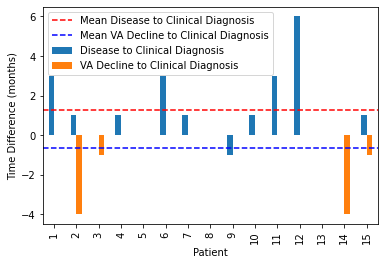

In [37]:
fig, ax = plt.subplots()
data.plot(x="Patient", y=["Disease to Clinical Diagnosis", "VA Decline to Clinical Diagnosis"], kind="bar", ax=ax)
ax.axhline(mean_disease_to_diagnosis, color='red', linestyle='--', label='Mean Disease to Clinical Diagnosis')
ax.axhline(mean_va_to_diagnosis, color='blue', linestyle='--', label='Mean VA Decline to Clinical Diagnosis')
ax.set_ylabel("Time Difference (months)")
ax.set_xlabel("Patient")
ax.legend()
plt.show()